In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
# import optimizer
from torch.optim import AdamW
from mnist_svd import MnistSVD
from unet import *

# inference

# test trained

In [120]:

net = UNet_MLP(input_dim = 28*28, time_emb_dim = 512, ranks = 28, scale = 12, block_layer = 2).cuda()
net.load_state_dict(torch.load("model.pth"))



<All keys matched successfully>

In [2]:
mnist_t = MnistSVD("data", train=True)
mnist = MnistSVD("data", train=False)

Done!
Done!


In [3]:
test_U, test_S, test_Vh, test_label = mnist_t[np.random.randint(len(mnist_t))]

test_rank = 1
inp = test_U[:,:test_rank] @ torch.diag(test_S[:test_rank]) @ test_Vh[:test_rank,:]
out = test_U[:,test_rank:] @ torch.diag(test_S[test_rank:]) @ test_Vh[test_rank:,:]

inp_flat = inp.flatten().unsqueeze(0).cuda()
out_flat = out.flatten().unsqueeze(0).cuda()

with torch.no_grad():
    est_out = net(inp_flat,torch.tensor([test_rank]).cuda())

plt.imshow(inp,cmap="gray")
plt.show()
plt.imshow(out,cmap="gray")
plt.show()
plt.imshow(est_out.cpu().reshape(28,28),cmap="gray")
plt.show()
plt.imshow(est_out.cpu().reshape(28,28)+inp,cmap="gray")
plt.show()

NameError: name 'net' is not defined

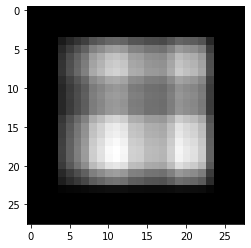

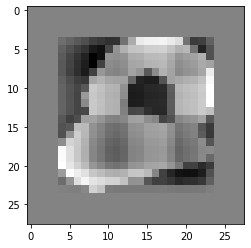

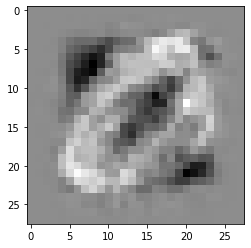

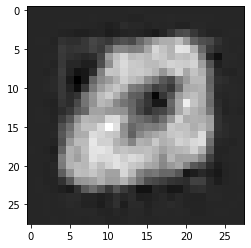

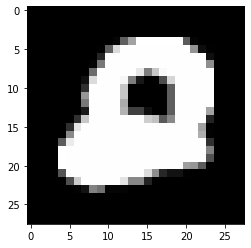

In [123]:
test_U, test_S, test_Vh, test_label = mnist[np.random.randint(len(mnist))]
test_rank = 1
inp = test_U[:,:test_rank] @ torch.diag(test_S[:test_rank]) @ test_Vh[:test_rank,:]
out = test_U[:,test_rank:] @ torch.diag(test_S[test_rank:]) @ test_Vh[test_rank:,:]

inp_flat = inp.flatten().unsqueeze(0).cuda()
out_flat = out.flatten().unsqueeze(0).cuda()

with torch.no_grad():
    est_out = net(inp_flat,torch.tensor([test_rank]).cuda())

plt.imshow(inp,cmap="gray")
plt.show()
plt.imshow(out,cmap="gray")
plt.show()
plt.imshow(est_out.cpu().reshape(28,28),cmap="gray")
plt.show()
plt.imshow(est_out.cpu().reshape(28,28)+inp,cmap="gray")
plt.show()
plt.imshow(out+inp,cmap="gray")
plt.show()

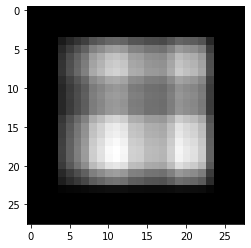

1 0


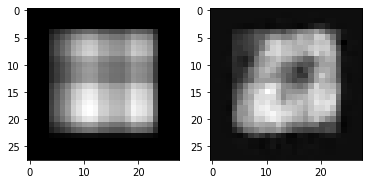

tensor([1.4093e+01, 3.9573e+00, 3.1028e+00, 2.2598e+00, 1.0309e+00, 9.4550e-01,
        7.3735e-01, 5.5740e-01, 5.4022e-01, 4.0167e-01, 3.3913e-01, 3.2010e-01,
        2.9316e-01, 2.3508e-01, 1.9889e-01, 1.5036e-01, 1.1050e-01, 8.6368e-02,
        5.7320e-02, 3.9813e-02, 2.1941e-02, 1.5261e-02, 6.0901e-03, 3.2932e-03,
        1.6092e-03, 1.3341e-03, 5.8235e-04, 4.0716e-04])
3 0


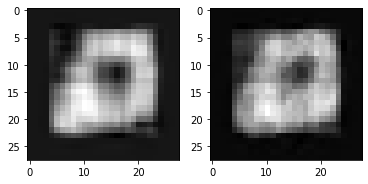

tensor([1.4086e+01, 3.8839e+00, 3.6539e+00, 1.9859e+00, 9.8539e-01, 8.7208e-01,
        6.7797e-01, 5.2595e-01, 4.9192e-01, 3.8366e-01, 3.2422e-01, 2.2876e-01,
        2.1112e-01, 1.8783e-01, 1.7587e-01, 1.1224e-01, 7.5205e-02, 5.0870e-02,
        3.2871e-02, 2.4935e-02, 1.8689e-02, 1.2687e-02, 5.7759e-03, 3.5160e-03,
        1.1542e-03, 1.0804e-03, 3.4237e-04, 1.2972e-04])
5 0


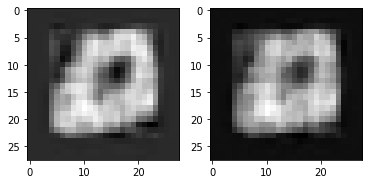

tensor([1.4083e+01, 3.7968e+00, 3.7019e+00, 2.4004e+00, 1.3597e+00, 5.2405e-01,
        4.5497e-01, 3.6855e-01, 3.5323e-01, 2.6734e-01, 2.0538e-01, 1.8753e-01,
        1.7393e-01, 1.2940e-01, 1.0347e-01, 9.6332e-02, 8.2179e-02, 5.1024e-02,
        3.5542e-02, 1.8466e-02, 7.6174e-03, 6.7205e-03, 6.4078e-03, 3.1258e-03,
        1.9414e-03, 7.8672e-04, 3.4000e-04, 9.1476e-05])
7 0


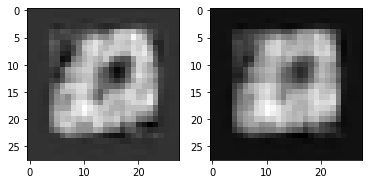

tensor([1.4086e+01, 3.8025e+00, 3.7001e+00, 2.3814e+00, 1.3677e+00, 5.4523e-01,
        4.8170e-01, 7.2964e-02, 5.3537e-02, 4.4150e-02, 3.8357e-02, 2.5816e-02,
        2.2674e-02, 2.0559e-02, 1.5537e-02, 1.2856e-02, 9.0708e-03, 7.3020e-03,
        6.4072e-03, 3.3048e-03, 2.1880e-03, 1.3615e-03, 1.1891e-03, 9.0329e-04,
        1.8437e-04, 1.2027e-04, 2.8980e-05, 3.8961e-06])
9 0


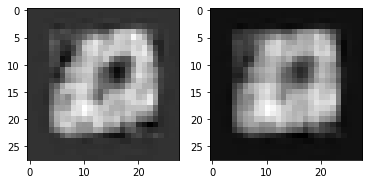

tensor([1.4086e+01, 3.8014e+00, 3.7024e+00, 2.3736e+00, 1.3597e+00, 5.4619e-01,
        4.9075e-01, 8.1997e-02, 6.9950e-02, 2.3420e-02, 1.6535e-02, 1.5254e-02,
        1.1031e-02, 1.0255e-02, 7.2230e-03, 4.9398e-03, 4.0132e-03, 2.2809e-03,
        1.8043e-03, 1.4019e-03, 1.0451e-03, 7.7450e-04, 3.3306e-04, 1.9972e-04,
        1.2527e-04, 7.6364e-05, 5.9624e-05, 1.1750e-05])
11 0


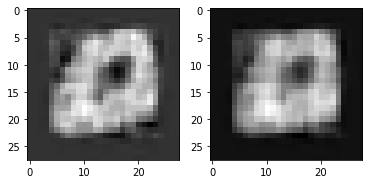

tensor([1.4085e+01, 3.8004e+00, 3.7052e+00, 2.3718e+00, 1.3566e+00, 5.4324e-01,
        4.9223e-01, 7.7460e-02, 7.1685e-02, 3.1925e-02, 2.3127e-02, 8.9330e-03,
        7.6597e-03, 6.4057e-03, 3.8572e-03, 3.1608e-03, 2.8263e-03, 2.0972e-03,
        1.7690e-03, 1.4155e-03, 1.0675e-03, 4.3555e-04, 2.4832e-04, 1.1635e-04,
        7.5484e-05, 4.3134e-05, 3.0850e-05, 2.8652e-05])
13 0


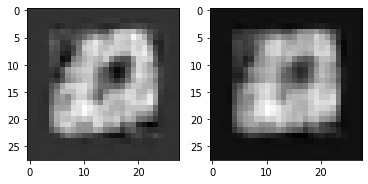

tensor([1.4085e+01, 3.8021e+00, 3.7065e+00, 2.3712e+00, 1.3542e+00, 5.4195e-01,
        4.9253e-01, 7.5937e-02, 7.4335e-02, 3.8673e-02, 2.8697e-02, 1.5051e-02,
        1.2500e-02, 5.4876e-03, 3.6083e-03, 3.0930e-03, 2.4763e-03, 1.9837e-03,
        1.4667e-03, 1.0249e-03, 6.8444e-04, 4.8079e-04, 2.9814e-04, 1.6064e-04,
        5.0189e-05, 4.8288e-05, 2.2776e-05, 5.8388e-06])
15 0


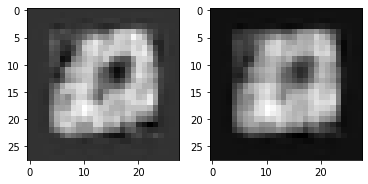

tensor([1.4083e+01, 3.8066e+00, 3.7079e+00, 2.3708e+00, 1.3533e+00, 5.4172e-01,
        4.9324e-01, 7.7588e-02, 7.5690e-02, 4.4538e-02, 3.4886e-02, 2.0151e-02,
        1.7613e-02, 9.1622e-03, 6.5674e-03, 3.2327e-03, 2.1765e-03, 2.0685e-03,
        1.5579e-03, 1.4363e-03, 7.8748e-04, 3.5998e-04, 2.5782e-04, 1.2665e-04,
        7.3842e-05, 4.7028e-05, 2.3599e-05, 1.3635e-05])
17 0


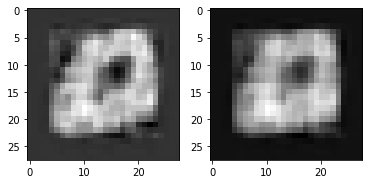

tensor([1.4082e+01, 3.8099e+00, 3.7087e+00, 2.3693e+00, 1.3530e+00, 5.4217e-01,
        4.9549e-01, 8.1671e-02, 7.5338e-02, 5.0977e-02, 4.1762e-02, 2.5310e-02,
        2.2273e-02, 1.2799e-02, 8.5755e-03, 6.4599e-03, 4.5909e-03, 2.7648e-03,
        1.4790e-03, 1.1953e-03, 7.3889e-04, 4.2104e-04, 3.3700e-04, 1.1143e-04,
        7.2898e-05, 4.2366e-05, 2.8225e-05, 1.2219e-05])
19 0


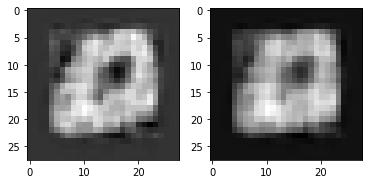

tensor([1.4081e+01, 3.8157e+00, 3.7105e+00, 2.3669e+00, 1.3513e+00, 5.4395e-01,
        4.9754e-01, 8.6973e-02, 7.8556e-02, 5.5885e-02, 4.8943e-02, 3.0360e-02,
        2.6948e-02, 1.6396e-02, 1.1561e-02, 9.3396e-03, 6.9316e-03, 4.7712e-03,
        3.0394e-03, 9.0993e-04, 4.7711e-04, 4.0783e-04, 3.2792e-04, 1.4308e-04,
        1.1893e-04, 5.2218e-05, 1.5785e-05, 1.0110e-05])
21 0


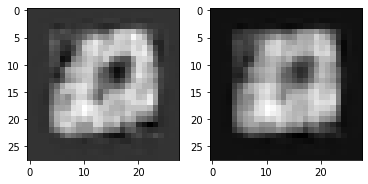

tensor([1.4079e+01, 3.8166e+00, 3.7093e+00, 2.3668e+00, 1.3502e+00, 5.4491e-01,
        4.9922e-01, 9.1733e-02, 7.9676e-02, 6.2201e-02, 5.4875e-02, 3.4115e-02,
        3.0925e-02, 2.0313e-02, 1.3957e-02, 1.3292e-02, 9.8763e-03, 7.0619e-03,
        3.9970e-03, 1.9356e-03, 1.2619e-03, 5.0655e-04, 3.6201e-04, 2.2862e-04,
        1.5551e-04, 7.2734e-05, 3.4412e-05, 1.9026e-05])
23 0


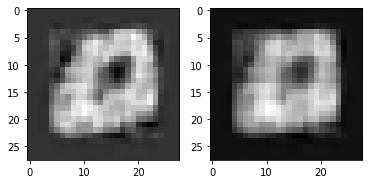

tensor([1.4079e+01, 3.8194e+00, 3.7094e+00, 2.3649e+00, 1.3483e+00, 5.4480e-01,
        5.0223e-01, 9.9222e-02, 8.3186e-02, 7.0197e-02, 6.1676e-02, 3.9135e-02,
        3.4178e-02, 2.4286e-02, 1.7252e-02, 1.6439e-02, 1.2853e-02, 9.2069e-03,
        5.3564e-03, 2.9632e-03, 2.0625e-03, 1.0775e-03, 5.5871e-04, 3.0628e-04,
        9.7356e-05, 6.9806e-05, 2.4467e-05, 3.3060e-06])
25 0


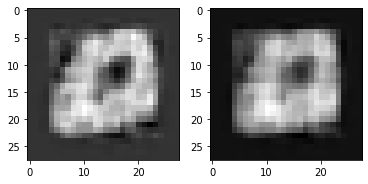

tensor([1.4078e+01, 3.8231e+00, 3.7097e+00, 2.3627e+00, 1.3475e+00, 5.4538e-01,
        5.0489e-01, 1.0717e-01, 8.8949e-02, 7.5411e-02, 6.5982e-02, 4.3779e-02,
        3.6536e-02, 2.8023e-02, 2.1239e-02, 1.8644e-02, 1.6260e-02, 1.0896e-02,
        7.0388e-03, 4.1789e-03, 2.5305e-03, 1.7829e-03, 5.6716e-04, 4.6448e-04,
        2.0915e-04, 5.9396e-05, 1.7750e-05, 6.3646e-06])
27 0


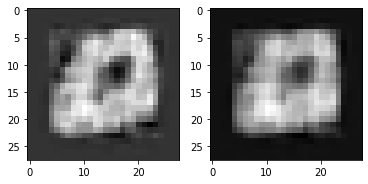

tensor([1.4077e+01, 3.8322e+00, 3.7084e+00, 2.3628e+00, 1.3473e+00, 5.4519e-01,
        5.0831e-01, 1.1804e-01, 9.5375e-02, 8.0985e-02, 6.9973e-02, 4.8826e-02,
        3.9280e-02, 3.1973e-02, 2.6457e-02, 2.1408e-02, 2.0343e-02, 1.2743e-02,
        8.5314e-03, 5.3847e-03, 3.1148e-03, 2.1401e-03, 9.0953e-04, 7.1460e-04,
        1.7195e-04, 1.0033e-04, 5.2042e-05, 1.3342e-05])


In [125]:
# multiple proximal gradient descent
now_U = test_U
now_S = test_S
now_Vh = test_Vh
plt.imshow(now_U[:,:1] @ torch.diag(now_S[:1]) @ now_Vh[:1,:],cmap="gray")
plt.show()
for now_rank in range(1,28,2):
    for i in range(1):
        now_inp = now_U[:,:now_rank] @ torch.diag(now_S[:now_rank]) @ now_Vh[:now_rank,:]
        #now_inp[now_inp<1e-3] = 0
        plt.subplot(1,2,1)
        plt.imshow(now_inp,cmap="gray")
        # plt.subplot(1,3,2)
        # plt.imshow(now_out - now_inp,cmap="gray")
        inp_flat = now_inp.flatten().unsqueeze(0).cuda()
        with torch.no_grad():
            est_out = net(inp_flat,torch.tensor([now_rank]).cuda())
        now_out = est_out.cpu().reshape(28,28) + now_inp
        #now_out[now_out<1e-3] = 0
        print(now_rank, i)
        
        plt.subplot(1,2,2)
        plt.imshow(now_out.cpu().reshape(28,28)+inp,cmap="gray")
        plt.show()
        now_U, now_S, now_Vh = torch.linalg.svd(now_out.float(), full_matrices=False)
        print(now_S)
